# 데이터 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')
import random

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
df = pd.read_excel("Churn.xlsx")
print(df.shape)
df.head()

(7043, 12)


,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,0,None,3,1,1,2,Month-to-Month,1,39.65,59.65,1
1,74,1,Offer E,3,1,0,1,Month-to-Month,8,80.65,1024.10,1
2,71,3,Offer D,2,0,2,1,Month-to-Month,18,95.45,1910.88,1
3,78,1,Offer C,2,2,2,1,Month-to-Month,25,98.50,2995.07,1
4,80,1,Offer C,2,0,0,1,Month-to-Month,37,76.50,3102.36,1


# Scaling

In [3]:
# Numeric Only
scaling_data = df.iloc[:,:-1]

Numeric_column_list = []
for i in range(len(scaling_data.columns)):
    if scaling_data[scaling_data.columns[i]].dtype == 'float64' or scaling_data[scaling_data.columns[i]].dtype == 'int64':
            Numeric_column_list.append(scaling_data.columns[i])

numeric_data = scaling_data[Numeric_column_list]

scaler = MinMaxScaler()

scaling_data[Numeric_column_list] = scaler.fit_transform(numeric_data)

In [4]:
scaling_data

,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue
0,0.967213,0.000000,None,0.50,0.25,0.5,0.333333,Month-to-Month,0.000000,0.212935,0.003202
1,0.901639,0.111111,Offer E,0.50,0.25,0.0,0.000000,Month-to-Month,0.098592,0.620896,0.083855
2,0.852459,0.333333,Offer D,0.25,0.00,1.0,0.000000,Month-to-Month,0.239437,0.768159,0.158013
3,0.967213,0.111111,Offer C,0.25,0.50,1.0,0.000000,Month-to-Month,0.338028,0.798507,0.248680
4,1.000000,0.111111,Offer C,0.25,0.00,0.0,0.000000,Month-to-Month,0.507042,0.579602,0.257652
...,...,...,...,...,...,...,...,...,...,...,...
7038,0.180328,0.000000,None,1.00,0.00,0.0,1.000000,Two Year,1.000000,0.028856,0.252398
7039,0.311475,0.222222,Offer C,0.50,0.75,1.0,0.333333,One Year,0.323944,0.662189,0.232992
7040,0.180328,0.222222,None,0.75,0.50,1.0,0.000000,One Year,1.000000,0.845274,0.788735
7041,0.213115,0.222222,None,0.75,0.25,0.0,0.333333,Month-to-Month,0.140845,0.112935,0.024908


# One-Hot Encoding

In [5]:
final_df = pd.get_dummies(scaling_data, columns = ['Membership', 'Contract'])
final_df

,Age,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Membership_None,Membership_Offer A,Membership_Offer B,Membership_Offer C,Membership_Offer D,Membership_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
0,0.967213,0.000000,0.50,0.25,0.5,0.333333,0.000000,0.212935,0.003202,1,0,0,0,0,0,1,0,0
1,0.901639,0.111111,0.50,0.25,0.0,0.000000,0.098592,0.620896,0.083855,0,0,0,0,0,1,1,0,0
2,0.852459,0.333333,0.25,0.00,1.0,0.000000,0.239437,0.768159,0.158013,0,0,0,0,1,0,1,0,0
3,0.967213,0.111111,0.25,0.50,1.0,0.000000,0.338028,0.798507,0.248680,0,0,0,1,0,0,1,0,0
4,1.000000,0.111111,0.25,0.00,0.0,0.000000,0.507042,0.579602,0.257652,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.180328,0.000000,1.00,0.00,0.0,1.000000,1.000000,0.028856,0.252398,1,0,0,0,0,0,0,0,1
7039,0.311475,0.222222,0.50,0.75,1.0,0.333333,0.323944,0.662189,0.232992,0,0,0,1,0,0,0,1,0
7040,0.180328,0.222222,0.75,0.50,1.0,0.000000,1.000000,0.845274,0.788735,1,0,0,0,0,0,0,1,0
7041,0.213115,0.222222,0.75,0.25,0.0,0.333333,0.140845,0.112935,0.024908,1,0,0,0,0,0,1,0,0


# 학습/테스트셋 분리

In [6]:
from sklearn.model_selection import train_test_split

y_target = df['Churn Value']
X_data = final_df

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.2, random_state=156)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5634, 18), (1409, 18), (5634,), (1409,))

# 모델 학습

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

정확도: 0.9510290986515259
f1-score: 0.9026798307475317
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1043
           1       0.93      0.87      0.90       366

    accuracy                           0.95      1409
   macro avg       0.94      0.93      0.93      1409
weighted avg       0.95      0.95      0.95      1409



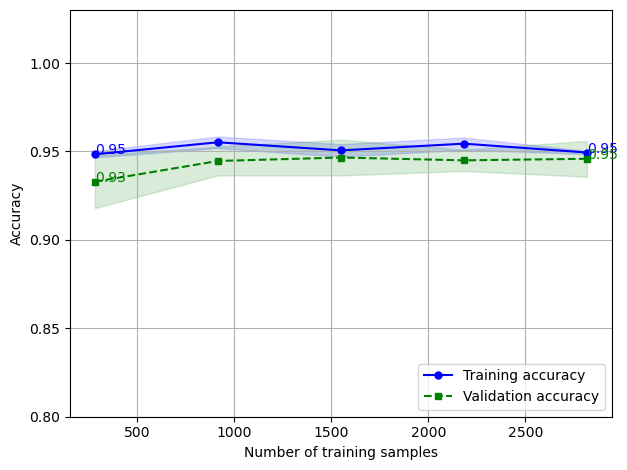

In [8]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_model, X=X_train, y=y_train, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [9]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.94941
last_validation_accuracy: 0.94586
L_V_diff: 0.00355


## 하이퍼파라미터 튜닝

### 주요 파라미터 설정

#### loss='log'
로지스틱 회귀 모델을 사용하여 이진 분류

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

'''
max_iter=10000 : 계산에 사용할 작업 수 
tol=1e-5 : 반복학습이 진행될 때 마다 loss값이 산출 => 이 loss값이 값이 줄어야함. loss값이 tol값보다 작으면 학습중단!
'''

sgd_model_log = SGDClassifier(random_state=42, loss='log_loss', max_iter=10000, tol=0.0001) 


sgd_model_log.fit(X_train, y_train)
y_pred = sgd_model_log.predict(X_test)

print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

정확도: 0.9467707594038325
f1-score: 0.8942172073342737
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1043
           1       0.92      0.87      0.89       366

    accuracy                           0.95      1409
   macro avg       0.94      0.92      0.93      1409
weighted avg       0.95      0.95      0.95      1409



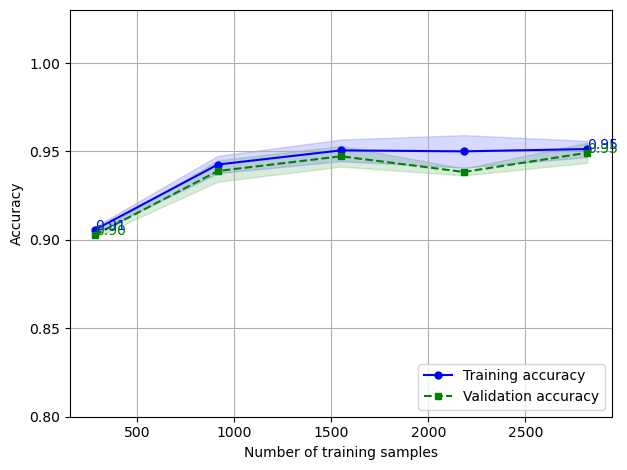

In [11]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_model_log, X=X_train, y=y_train, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [12]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.95137
last_validation_accuracy: 0.94924
L_V_diff: 0.00213


#### loss='hinge'
SVM 모델을 사용하여 이진 분류를 수행

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

'''
max_iter=10000 : 계산에 사용할 작업 수 
tol=1e-5 : 반복학습이 진행될 때 마다 loss값이 산출 => 이 loss값이 값이 줄어야함. loss값이 tol값보다 작으면 학습중단!
'''

sgd_model_hinge = SGDClassifier(random_state=42, loss='hinge', max_iter=10000, tol=0.0001) 


sgd_model_hinge.fit(X_train, y_train)
y_pred = sgd_model_hinge.predict(X_test)

print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

정확도: 0.9510290986515259
f1-score: 0.9026798307475317
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1043
           1       0.93      0.87      0.90       366

    accuracy                           0.95      1409
   macro avg       0.94      0.93      0.93      1409
weighted avg       0.95      0.95      0.95      1409



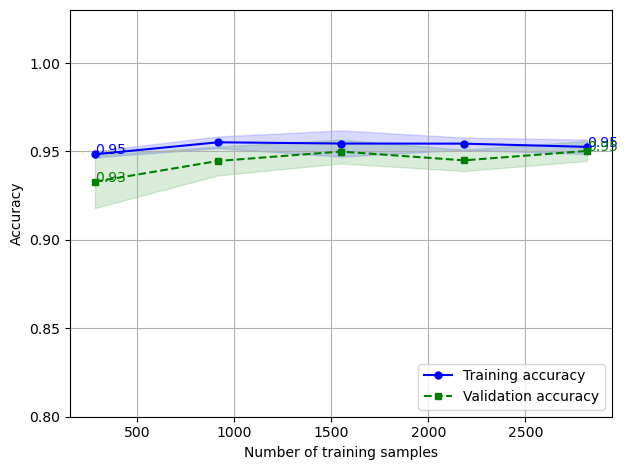

In [14]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_model_hinge, X=X_train, y=y_train, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [15]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.95261
last_validation_accuracy: 0.95030
L_V_diff: 0.00231


### GridSearchCV

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# 모델 생성
sgd_model = SGDClassifier(random_state=42)

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'loss': ['hinge', 'log_loss', 'perceptron'],  # loss 함수의 여러 옵션
    'penalty': ['l1', 'l2'],  # 정규화 옵션
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [100, 500, 1000, 10000],  # 반복 횟수
    'tol': [1e-3, 1e-4, 1e-5]  # 중단 기준(loss가 이 값보다 작아지면 중단)
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=sgd_model, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치 실행
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델 사용
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 결과 출력
print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


Best Parameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l1', 'tol': 0.0001}
정확도: 0.9474804826117814
f1-score: 0.8980716253443526
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1043
           1       0.91      0.89      0.90       366

    accuracy                           0.95      1409
   macro avg       0.93      0.93      0.93      1409
weighted avg       0.95      0.95      0.95      1409



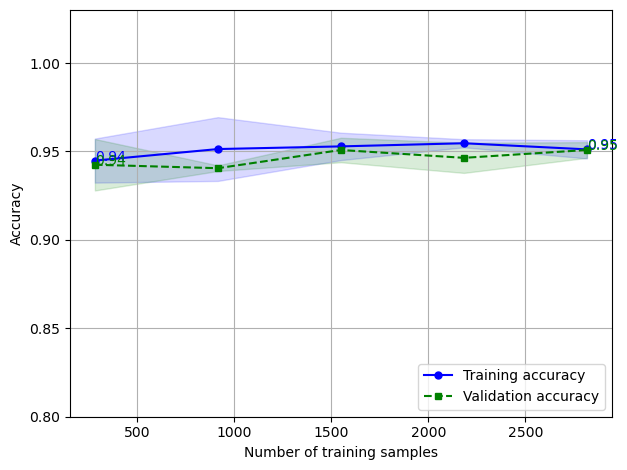

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=best_model, X=X_train, y=y_train, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [18]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.95119
last_validation_accuracy: 0.95083
L_V_diff: 0.00035


# 학습 결과

* 하이퍼파라미터 튜닝 전 (SGDClassifier(random_state=42))
 * **정확도 : 0.9510290986515259**
 * 학습곡선
     * last_train_accuracy: 0.94941
     * last_validation_accuracy: 0.94586
     * L_V_diff: 0.00355


* 주요 하이퍼파라미터 설정 (SGDClassifier(random_state=42, loss='log', max_iter=10000, tol=1e-5))
    * 정확도 : 0.9467707594038325
    * 학습곡선
        * last_train_accuracy: 0.95137
        * last_validation_accuracy: 0.94924
        * L_V_diff: 0.00213
        

* 주요 하이퍼파라미터 설정 (SGDClassifier(random_state=42, loss='hinge', max_iter=10000, tol=1e-5))
    * **정확도 : 0.9510290986515259**
    * 학습곡선
        * last_train_accuracy: 0.95261
        * last_validation_accuracy: 0.95030
        * L_V_diff: 0.00231
        
        
* GridSearchCV (Best Parameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l1', 'tol': 0.0001})
    * 정확도 : 0.9474804826117814
    * 학습곡선
        * last_train_accuracy: 0.95119
        * last_validation_accuracy: 0.95083
        * **L_V_diff: 0.00035**